In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#pathes
test_path = "test_x.csv"
train_path = "train.csv"
#config_path = "config.py"

In [3]:
train_data = pd.read_csv(train_path)
train_data.describe()

,user_id,org_id,rating,ts,average_bill,rating_org,food_delivery,breakfast,takeaway,summer_terrace,...,call_button,wheelchair_accessible,table_games,vinotheque,cakes_for_different_occasions,accepted_credit_cards,kalyan,teahouse,bread_from_tandoor,handmade_goods
count,7.399500e+04,7.399500e+04,73995.000000,73995.000000,45433.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,...,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000
mean,9.196627e+18,9.038261e+18,4.322779,714.540766,1075.891973,4.319332,0.757119,0.576607,0.649206,0.602554,...,0.008014,0.007406,0.017677,0.002149,0.002419,0.001027,0.000932,0.001230,0.002960,0.001216
std,5.312861e+18,5.275833e+18,1.130370,293.492213,2733.507688,0.308584,0.428827,0.494100,0.477222,0.489373,...,0.089162,0.085739,0.131775,0.046306,0.049125,0.032032,0.030523,0.035047,0.054323,0.034854
min,1.445171e+14,1.626686e+15,1.000000,0.000000,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.614445e+18,4.504716e+18,4.000000,505.000000,500.000000,4.180952,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.191287e+18,9.104453e+18,5.000000,699.000000,500.000000,4.368304,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.376070e+19,1.350392e+19,5.000000,958.000000,1000.000000,4.524001,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.844666e+19,1.844531e+19,5.000000,1216.000000,246500.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(train_data, test_size = 0.2)

## Data Analisis

Во-первых рейтинг для всех записей определён - это хорошо.
Во-вторых распределение довольно странное.

0


(array([1.3000e+01, 7.0000e+00, 5.0000e+00, 6.0000e+00, 7.0000e+00,
        1.4000e+01, 3.4000e+01, 3.5000e+01, 4.4000e+01, 9.7000e+01,
        1.9100e+02, 3.5000e+02, 6.8300e+02, 1.7060e+03, 3.5200e+03,
        9.2250e+03, 1.6277e+04, 1.9157e+04, 7.1540e+03, 6.7100e+02]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 20 Patch objects>)

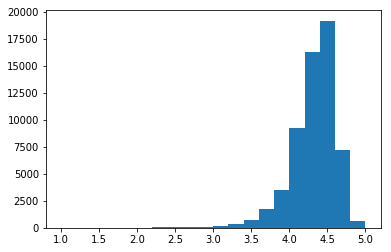

In [5]:
print(train.rating.isnull().sum())
plt.hist(train.rating_org, bins = 20)

Рассмотрим, как разные характеристики коррелируют.

Почему-то существует большая корреляция между наличием караоке, крафтового пива и спортивных трансляций и рейтингом. Ещё интересные характеристики: takeaway, privilege_tickets. Искренне не понимаю, что такое privelege_tickets.

In [6]:
feat = ['takeaway', 'karaoke', 'sports_broadcasts', 
        'craft_beer', 'privilege_tickets', 'rating', 'food_delivery']

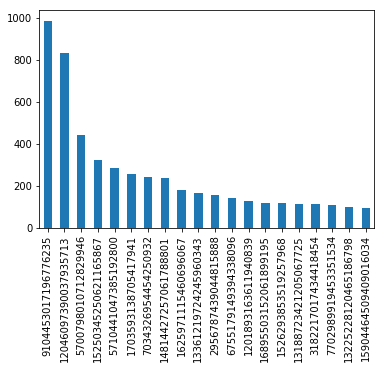

In [7]:
train.org_id.value_counts()[:20].plot(kind = 'bar')

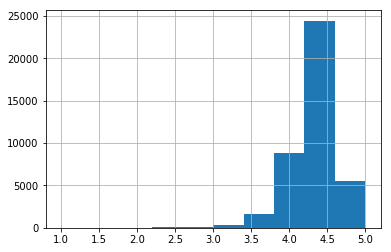

In [8]:
train[train.org_city == 'msk'].rating_org.hist()

In [9]:
train.minimum_order.describe()

count    59196.000000
mean         0.025508
std          0.157665
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: minimum_order, dtype: float64

In [10]:
train.org_city.unique()

array(['spb', 'msk'], dtype=object)

In [11]:
train.average_bill.describe()

count     36349.000000
mean       1067.154530
std        2544.927955
min         500.000000
25%         500.000000
50%         500.000000
75%        1000.000000
max      246500.000000
Name: average_bill, dtype: float64

In [12]:
train.hall_capacity.describe()

count    59196.000000
mean         0.010372
std          0.101316
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: hall_capacity, dtype: float64

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73995 entries, 0 to 73994
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         73995 non-null  uint64 
 1   org_id                          73995 non-null  uint64 
 2   rating                          73995 non-null  float64
 3   ts                              73995 non-null  int64  
 4   user_city                       73995 non-null  object 
 5   org_city                        73995 non-null  object 
 6   average_bill                    45433 non-null  float64
 7   rating_org                      73995 non-null  float64
 8   rubrics                         73995 non-null  object 
 9   food_delivery                   73995 non-null  int64  
 10  breakfast                       73995 non-null  int64  
 11  takeaway                        73995 non-null  int64  
 12  summer_terrace                  

In [14]:
corr = train.corr().abs()
#print(corr)
sorted_corr = corr[['rating', 'rating_org']].sort_values('rating_org', ascending=False)
sorted_corr.head(30)

,rating,rating_org
rating_org,0.269613,1.000000
rating,1.000000,0.269613
cafe,0.043391,0.182066
toilet_for_disabled,0.046464,0.175113
parking_disabled,0.042966,0.167805
automatic_door,0.041460,0.152557
payment_by_credit_card,0.036086,0.150341
wheelchair_access,0.033542,0.121969
craft_beer,0.037663,0.120185
car_park,0.021826,0.120086


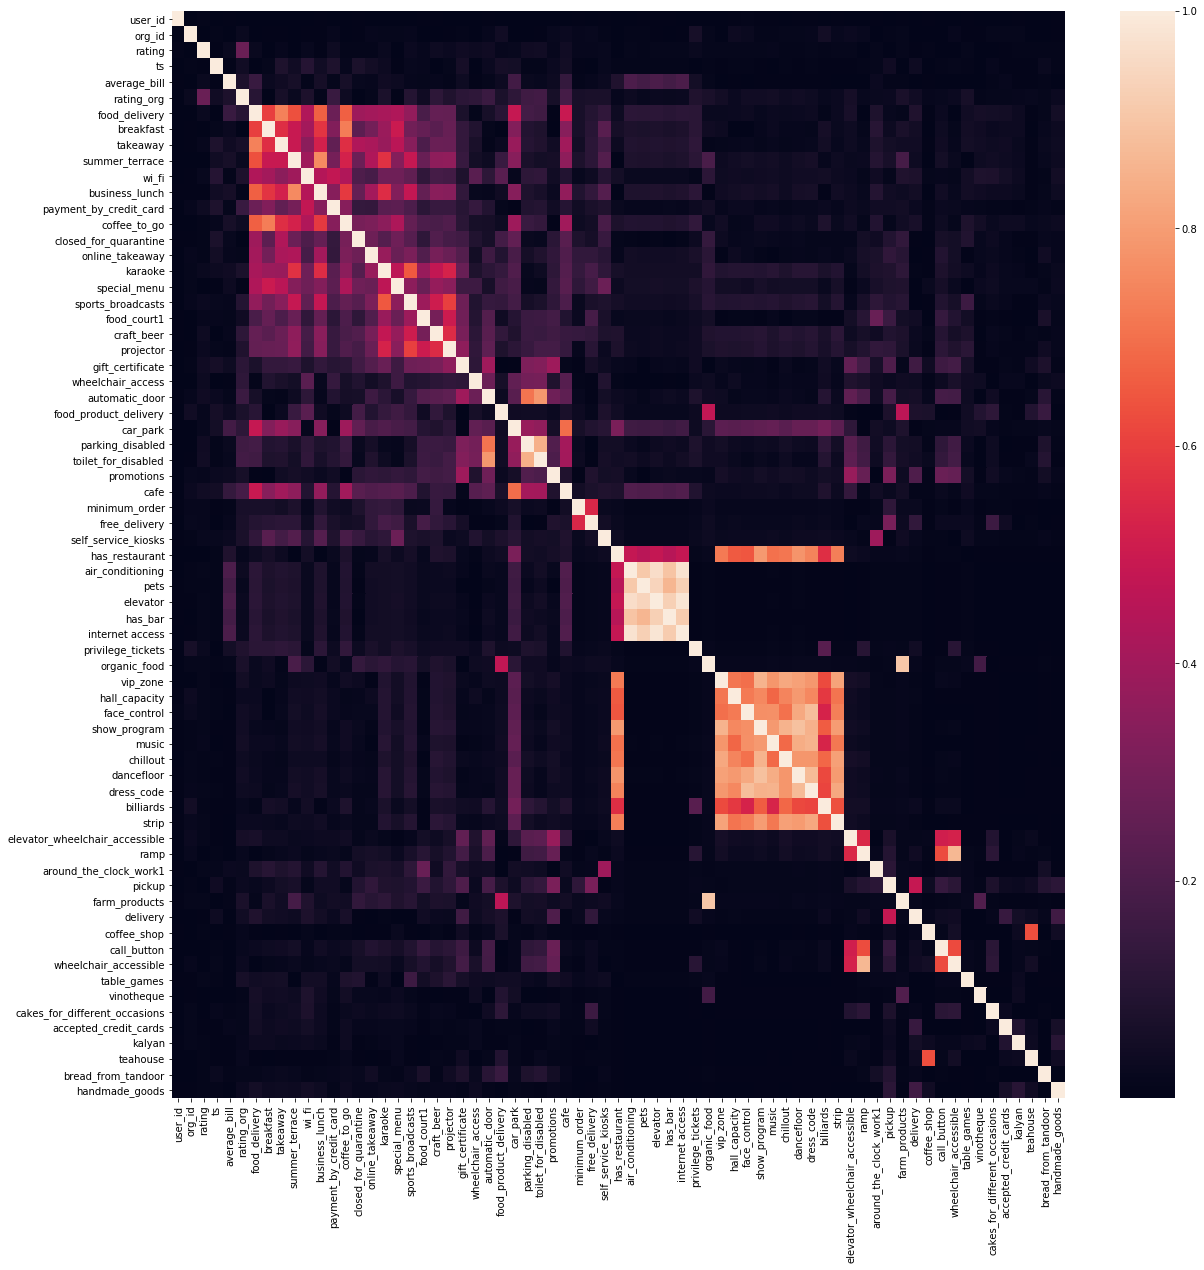

In [15]:
import seaborn as sns
params = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = (20,20)
sns.heatmap(train.corr().abs())
plt.rcParams["figure.figsize"] = params

In [16]:
rubrics = pd.get_dummies(train.rubrics)
tmp = pd.concat([rubrics, train.rating_org], axis = 1)
most_corr_rubrics = tmp.corr().abs().sort_values('rating_org', ascending=False).head(8).index[1:].values.tolist()
print(most_corr_rubrics)

['Быстрое питание', 'Кофейня', 'Суши-бар', 'Столовая', 'Ресторан', 'Бар, паб', 'Кальян-бар']


## Final features

- Хочется иметь признак, определяющий актуальность отзыва по времени его написания (ts)
- Хочется иметь признак, определяющий является ли ресторан спорт-баром, потому что у них оценки выше
- Очевидно, что rating_org зависит напрямую от rating
- Возможно было неплохо иметь признак учитывающий популярность, но тогда нужно создавать датасет, который собирает вообще все отзывы
- Можно считать среднее от отзывов на ресторан, которые мы уже имеем
- Есть юзеры, которые ставят оценки в среднем ниже, чем остальные, а есть те, которые выше, чем остальные. Можно всех уравнять.

In [17]:
from sklearn.preprocessing import OneHotEncoder 
def make_features(data, dop = None):
    features = ['karaoke', 'cafe', 'car_park', 'parking_disabled', 'projector']
    features += ['promotions', 'minimum_order', 'music']
    features += ['self_service_kiosks', 'table_games']
    new_data = data.copy()
    
    rubrics = pd.get_dummies(new_data.rubrics, dummy_na=True)
    new_data = pd.concat([new_data, rubrics[most_corr_rubrics]], axis=1)
    
    
    #takeaway united feature
    new_data['bool_food_delivery'] = data.food_delivery.astype(bool)
    new_data['bool_takeaway'] = data.takeaway.astype(bool)
    new_data['takeaway_delivery'] = data.food_delivery.astype(bool) | data.takeaway.astype(bool)
    
    #
    new_data['loyalty_program'] = data.gift_certificate.astype(bool) | data.privilege_tickets.astype(bool)
    
    #add previous info
    united = data if dop is None else pd.concat([data, dop])
    popularity = united.org_id.value_counts()
    mean = united.groupby('org_id').rating.mean()
    new_data.average_bill = new_data.average_bill.fillna(united.average_bill.dropna().mean())
    
    #number of reviews with normalization
    new_data['popularity'] = data.org_id.apply(lambda id: popularity[id])
    new_data.popularity = (new_data.popularity - np.min(popularity))/(np.max(popularity) - np.min(popularity))  
    
    #is restourant a sport bar
    new_data['sport_bar'] =  data.sports_broadcasts.astype(bool) | data.craft_beer.astype(bool)
    #new_data.org_city = new_data.org_city.apply(lambda city: 0 if city == "msk" else 1)
    
    #try to take mean from whole dataset
    new_data['mean_rate'] = data.org_id.apply(lambda id: mean[id])
    new_data.mean_rate = (new_data.mean_rate - np.min(mean))/(np.max(mean) - np.min(mean)) 
    
    #city_features
    #one of them is not enough
    new_data['is_msk'] = data.org_city.apply(lambda city: 1 if city == "msk" else 0)
    new_data['is_spb'] = data.org_city.apply(lambda city: 1 if city == "spb" else 0)
    
    
    #normalized ts
    new_data.ts = (new_data.ts - np.min(new_data.ts))/(np.max(new_data.ts) - np.min(new_data.ts)) 
    
    new_data.org_id = (new_data.org_id - np.min(new_data.org_id))/(np.max(new_data.org_id) - np.min(new_data.org_id)) 
    new_data.rating = (new_data.rating - np.min(new_data.rating))/(np.max(new_data.rating) - np.min(new_data.rating))
    
    #time meals feature
    #new_data['time_meals'] = data.breakfast.astype(bool)
    new_data['summer_lunch'] = data.summer_terrace.astype(bool) | data.business_lunch.astype(bool)
    
    #is a cute cafe
    new_data['cute_cafe'] = data.wi_fi.astype(bool) & data.car_park.astype(bool)
    
    #is restourant a hookah
    #print(data.teahouse.describe())
    new_data['hookah'] =  data.kalyan.astype(bool) | data.teahouse.astype(bool)
    
    #lunch
    new_data['lunch'] =  data.payment_by_credit_card.astype(bool) | data.business_lunch.astype(bool)
    #new_data['seasonal'] = data.summer_terrace.astype(bool) | 
    
    #is vip |
    '''new_data['is_vip'] = data.vip_zone.astype(bool)  | data.face_control.astype(bool) | data.hall_capacity.astype(bool)
    new_data.is_vip = new_data.is_vip | data.show_program.astype(bool)
    new_data.is_vip = new_data.is_vip | data.billiards.astype(bool) | data.strip.astype(bool)'''
    
    #normalized average bill
    new_data.average_bill = (new_data.average_bill - np.min(new_data.average_bill))/(np.max(new_data.average_bill) - np.min(new_data.average_bill)) 
    
    #for disabled
    new_data['disable'] = data.wheelchair_access.astype(bool) | data.toilet_for_disabled.astype(bool) | data.automatic_door.astype(bool)
    #new_data.disable = new_data.disable | data.parking_disabled.astype(bool) #| data.elevator_wheelchair_accessible.astype(bool)
    
    #healthy products
    new_data['healthy'] = data.farm_products.astype(bool) & data.organic_food.astype(bool)
    
    #add new features to list
    features.append('rating')
    #features.append('ts')
    features.append('takeaway_delivery')
    features.append('popularity')
    features.append('mean_rate')
    features.append('sport_bar')
    #features.append('hookah')
    #features.append('is_msk')
    #features.append('is_spb')
    #features.append('org_id')
    #features.append('summer_lunch')
    features.append('average_bill')
    #features.append('is_vip')
    features.append('cute_cafe')
    features.append('disable')
    features.append('healthy')
    #features.append('avg_msk')
    features.append('lunch')
    features.append('loyalty_program')
    return new_data, features
def make_selection(data, test = False, gr = False, dop = None):
    new_data, features = make_features(data, dop)
    if not test:
        if gr:
            features_y = features + ["rating_org"]
            sns.heatmap(new_data[features_y].corr().abs(), vmin=0, vmax=0.6, cmap="BuPu")
            print(new_data[features_y].corr().rating_org)
        return new_data[features], new_data.rating_org 
    else:
        return new_data[features]

## Math Checking & Graphics

## Result features

karaoke                0.072360
cafe                   0.182066
car_park               0.120086
parking_disabled       0.167805
projector              0.083709
promotions             0.059367
minimum_order         -0.063372
music                 -0.049965
self_service_kiosks   -0.068917
table_games            0.061898
rating                 0.269613
takeaway_delivery     -0.108628
popularity             0.207642
mean_rate              0.439901
sport_bar              0.110344
average_bill           0.058534
cute_cafe              0.127269
disable                0.132942
healthy                0.069913
lunch                  0.148933
loyalty_program        0.134321
rating_org             1.000000
Name: rating_org, dtype: float64


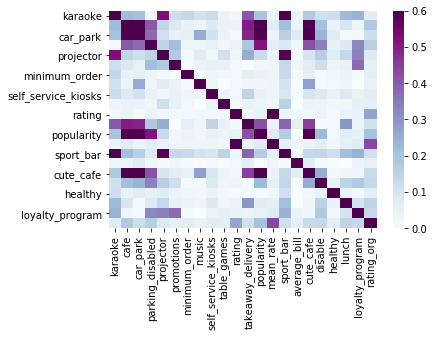

In [18]:
X, y = make_selection(train, gr = True)
#X

In [19]:
test_X, test_y = make_selection(test, dop = train)

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
'''best_score = 0
for k in range(1, 11):
    knn_clf = KNeighborsRegressor(n_neighbors=k)
    knn_clf.fit(X, y)
    score = knn_clf.score(test_X, test_y)
    print(score)
    if score > best_score:
        best_k = k
        best_score = score
best_k'''

'best_score = 0\nfor k in range(1, 11):\n    knn_clf = KNeighborsRegressor(n_neighbors=k)\n    knn_clf.fit(X, y)\n    score = knn_clf.score(test_X, test_y)\n    print(score)\n    if score > best_score:\n        best_k = k\n        best_score = score\nbest_k'

In [22]:
'''best_score = 0
for k in range(11, 20):
    knn_clf = KNeighborsRegressor(n_neighbors=k)
    knn_clf.fit(X, y)
    score = knn_clf.score(test_X, test_y)
    print(score)
    if score > best_score:
        best_k = k
        best_score = score
best_k'''

'best_score = 0\nfor k in range(11, 20):\n    knn_clf = KNeighborsRegressor(n_neighbors=k)\n    knn_clf.fit(X, y)\n    score = knn_clf.score(test_X, test_y)\n    print(score)\n    if score > best_score:\n        best_k = k\n        best_score = score\nbest_k'

In [23]:
'''best_score = 0
for k in range(20, 31):
    knn_clf = KNeighborsRegressor(n_neighbors=k)
    knn_clf.fit(X, y)
    score = knn_clf.score(test_X, test_y)
    print(score)
    if score > best_score:
        best_k = k
        best_score = score
best_k'''

'best_score = 0\nfor k in range(20, 31):\n    knn_clf = KNeighborsRegressor(n_neighbors=k)\n    knn_clf.fit(X, y)\n    score = knn_clf.score(test_X, test_y)\n    print(score)\n    if score > best_score:\n        best_k = k\n        best_score = score\nbest_k'

In [24]:
'''best_score = 0
for k in range(1, 20):
    for p in range(2, 4):
        knn_clf = KNeighborsRegressor(n_neighbors=k, p = p)
        knn_clf.fit(X, y)
        score = knn_clf.score(test_X, test_y)
        print(score, k, p)
        if score > best_score:
            best_k = k
            best_score = score
best_k'''

'best_score = 0\nfor k in range(1, 20):\n    for p in range(2, 4):\n        knn_clf = KNeighborsRegressor(n_neighbors=k, p = p)\n        knn_clf.fit(X, y)\n        score = knn_clf.score(test_X, test_y)\n        print(score, k, p)\n        if score > best_score:\n            best_k = k\n            best_score = score\nbest_k'

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model = KNeighborsRegressor()
params = {'n_neighbors': range(1, 100), 'p': range(2, 5)}
model_learned = RandomizedSearchCV(model, params)
model_learned.fit(X, y)
model_learned.best_params

## Learning

In [ ]:
model = KNeighborsRegressor(n_neighbors=23, weights = 'distance')
model.fit(X, y)

## Inner checking

In [ ]:
pred = model.predict(test_X)

In [ ]:
plt.hist(pred, bins = 20)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(2**pred,2**test_y)

## Submission

In [ ]:
version = 25

In [ ]:
test_data = pd.read_csv(test_path)
test_data

In [ ]:
final_test_X = make_selection(test_data, test = True, dop = train_data)
final_test_X

In [ ]:
final_pred = model.predict(final_test_X)

In [ ]:
plt.hist(final_pred, bins = 20)

In [ ]:
print(test_data.index)
result = pd.DataFrame({'id': test_data.index, 'rating_org': final_pred})
result.set_index('id', inplace = True)
result.head()

In [ ]:
config = pd.DataFrame({'v': [version], 'mape': [mean_absolute_percentage_error(pred, test_y)]})
#config.set_index('v', inplace = True)


In [ ]:
import os 
dir = 'submission' + str(version)
os.makedirs(dir, exist_ok=True)  
result.to_csv(dir + '/submission' + str(version) + ".csv") 
config.to_csv(dir + '/config' + str(version) + '.csv')